# Ceny Nieruchomości
## Rachunek Prawdopodobieństwa i Statystyka
Hubert Tułacz


W tym pliku przedstawiona jest analiza wstępna cen mieszkań w kilku największych miastach w Polsce

In [66]:
import pandas as pd
import sqlite3
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Import danych i zapisanie ich w bazie SQlite

In [12]:
csv_ap = './datacsv/apartments_pl_2024_01.csv'
db = './datadb/apartments.db'

In [13]:
conn = sqlite3.connect(db)
cursor = conn.cursor()

In [6]:
with open(csv_ap, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    create_table = f"CREATE TABLE IF NOT EXISTS tabela ({headers[0]} TEXT, {headers[1]} TEXT, {headers[2]} TEXT, {headers[3]} FLOAT, {headers[4]} INTEGER, {headers[5]} INTEGER, {headers[6]} INTEGER, {headers[7]} INTEGER, {headers[8]} FLOAT, {headers[9]} FLOAT, {headers[10]} FLOAT, {headers[11]} INTEGER, {headers[12]} FLOAT, {headers[13]} FLOAT, {headers[14]} FLOAT, {headers[15]} FLOAT, {headers[16]} FLOAT, {headers[17]} FLOAT, {headers[18]} FLOAT, {headers[19]} TEXT, {headers[20]} TEXT, {headers[21]} TEXT, {headers[22]} TEXT, {headers[23]} TEXT, {headers[24]} TEXT, {headers[25]} TEXT, {headers[26]} TEXT, {headers[27]} FLOAT);"
    cursor.execute(create_table)
    for row in csv_reader:
        insert_query = f"INSERT INTO tabela VALUES ({', '.join(['?' for _ in row])});"
        cursor.execute(insert_query,row)
conn.commit()

In [20]:
df = pd.read_csv(csv_ap, sep=',')

In [ ]:
conn.close()

In [27]:
df.sample(10)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
6811,3bd4e2d72039d80ba7602befac012eff,wroclaw,blockOfFlats,36.00,2.0,1.0,8.0,1976.0,51.071174,17.004318,...,0.401,condominium,concreteSlab,premium,yes,no,yes,no,no,498000
13587,fea64d5f17c93a02c2422b01d724d750,warszawa,tenement,63.00,3.0,3.0,4.0,1940.0,52.240432,20.970323,...,0.313,condominium,brick,premium,no,yes,no,no,no,960000
13032,780a99f838aa225e551f3b6e31e27e9d,warszawa,blockOfFlats,56.80,3.0,10.0,15.0,1980.0,52.280907,20.931380,...,0.299,condominium,concreteSlab,premium,no,no,yes,no,yes,890000
8955,a26c2ef815a57ade851628df8497f9f1,lodz,tenement,81.94,5.0,3.0,4.0,1920.0,51.774900,19.455400,...,0.158,condominium,brick,premium,no,no,no,yes,no,599000
11014,a6306066b5e99bdb6deeaa6b2e9f76b2,warszawa,blockOfFlats,45.75,2.0,1.0,4.0,2007.0,52.253095,20.934899,...,0.221,condominium,brick,premium,no,yes,yes,no,no,899000
9292,ccfb966b076b88d4c9821f3294ae2bb0,lodz,blockOfFlats,61.37,2.0,11.0,11.0,1970.0,51.794400,19.447900,...,0.272,condominium,concreteSlab,low,no,no,yes,no,no,349000
11527,6151dc96933082444eda39df6034d2eb,warszawa,apartmentBuilding,58.83,3.0,1.0,3.0,2016.0,52.167232,21.068791,...,0.258,condominium,brick,premium,yes,yes,yes,no,no,1170000
2189,bd4a330c5167ad8cb4103e297b12d61c,krakow,blockOfFlats,67.26,3.0,2.0,2.0,2008.0,50.101225,19.872351,...,2.042,condominium,brick,premium,yes,no,no,no,no,799000
2825,6b64299afee289e86e0fe6d9a994b20c,krakow,apartmentBuilding,59.40,3.0,4.0,4.0,1980.0,50.095960,19.946735,...,0.200,condominium,concreteSlab,premium,no,yes,no,no,no,799000
6504,16a871d03cefcbf49180e962440e5bf0,wroclaw,apartmentBuilding,39.00,2.0,9.0,17.0,2018.0,51.078552,17.053195,...,0.394,condominium,brick,premium,yes,yes,yes,yes,no,973000


In [24]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1231 to 14769
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1218 non-null   object 
 1   city                  1218 non-null   object 
 2   type                  1218 non-null   object 
 3   squareMeters          1218 non-null   float64
 4   rooms                 1218 non-null   float64
 5   floor                 1218 non-null   float64
 6   floorCount            1218 non-null   float64
 7   buildYear             1218 non-null   float64
 8   latitude              1218 non-null   float64
 9   longitude             1218 non-null   float64
 10  centreDistance        1218 non-null   float64
 11  poiCount              1218 non-null   float64
 12  schoolDistance        1218 non-null   float64
 13  clinicDistance        1218 non-null   float64
 14  postOfficeDistance    1218 non-null   float64
 15  kindergartenDistance  

(1218, 28)

Usunięcie niepotrzebnych danych takich jak informacje o innych miastach

In [75]:
df = df[df['city'].isin(['warszawa','krakow','wroclaw','lodz','poznan'])]
df.drop(['floor','floorCount','latitude','longitude','ownership','rooms','buildingMaterial'],axis=1,inplace=True)

In [77]:
df.sample(10)

,id,city,type,squareMeters,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
12249,829af29798e4032d59353642e57e55ac,warszawa,apartmentBuilding,57.94,2017.0,6.57,11.0,0.329,1.855,0.184,...,0.114,2.933,0.116,premium,yes,yes,yes,no,no,985000
8594,bae08fa08425723556cd35371d5866bc,lodz,blockOfFlats,52.57,1976.0,4.14,7.0,0.128,2.372,0.626,...,0.344,0.129,0.460,low,no,yes,no,no,no,385000
12502,02b566caf70ff69c81bd9067a3b09f2d,warszawa,blockOfFlats,51.00,2008.0,9.92,13.0,0.529,2.872,0.537,...,0.250,3.529,0.594,premium,yes,yes,no,no,yes,679000
14237,b7875e256d9e320aa7a0aeda325f7d5c,warszawa,apartmentBuilding,42.00,2023.0,7.19,5.0,0.241,0.931,0.523,...,0.249,2.813,0.336,premium,yes,yes,yes,no,no,929000
2008,ef6daff80fe48405debe708587ca2cd4,krakow,apartmentBuilding,43.00,2022.0,6.91,5.0,0.320,0.995,0.209,...,0.213,4.648,0.149,premium,no,no,yes,no,yes,750000
7150,3d1147c5c07c9b5d0b5aa6bb41b9249a,wroclaw,blockOfFlats,62.51,1989.0,2.42,39.0,0.285,1.087,0.412,...,0.030,0.435,0.176,low,no,yes,yes,no,yes,675000
6108,3531a6b0a4ee5921032cb688f9657311,wroclaw,blockOfFlats,42.00,1980.0,3.98,19.0,0.341,0.840,0.472,...,0.074,1.572,0.067,premium,no,no,no,no,yes,480000
3344,be1dcecca11916adf725a4e700bc9545,krakow,blockOfFlats,89.80,1965.0,1.89,29.0,0.309,0.260,0.252,...,0.162,0.320,0.246,premium,no,no,no,no,yes,1400000
7258,d3497bb8aebc4bbc07b1d2e34f4dbd48,wroclaw,tenement,89.50,1935.0,3.73,6.0,0.558,1.008,0.449,...,0.381,1.272,0.374,low,yes,yes,no,no,yes,1280000
6355,1ff00ff187d99de698697ab9c1999ce1,wroclaw,apartmentBuilding,64.50,2013.0,0.52,39.0,0.401,0.593,0.284,...,0.114,0.365,0.219,premium,yes,no,yes,no,no,1220000


In [23]:
df.dropna(inplace=True)

In [76]:
df.describe()

,squareMeters,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,61.698941,1984.824302,4.489754,23.935140,0.360924,0.859387,0.460479,0.295127,0.268587,1.395428,0.290865,9.616286e+05
std,23.220957,35.579813,2.796532,28.438084,0.300655,0.795404,0.327482,0.242810,0.247511,1.082060,0.250888,4.718430e+05
min,25.000000,1860.000000,0.160000,0.000000,0.021000,0.014000,0.009000,0.020000,0.002000,0.026000,0.006000,1.900000e+05
25%,45.325000,1961.250000,2.152500,8.000000,0.171000,0.322250,0.237250,0.147000,0.105000,0.542500,0.137000,6.690000e+05
50%,58.000000,1996.500000,4.100000,16.000000,0.283000,0.625500,0.394000,0.238000,0.197000,1.069500,0.227500,8.500000e+05
75%,73.000000,2016.000000,6.180000,28.000000,0.441500,1.066500,0.590750,0.371000,0.352000,2.064000,0.369750,1.150000e+06
max,150.000000,2024.000000,16.360000,210.000000,2.448000,4.789000,2.600000,2.956000,1.971000,4.977000,2.071000,3.200000e+06


In [48]:
def draw_hist(data,x,y,title,color='skyblue',edgecolor='black',label =''):
    plt.hist(data,color=color,edgecolor=edgecolor,label=label)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

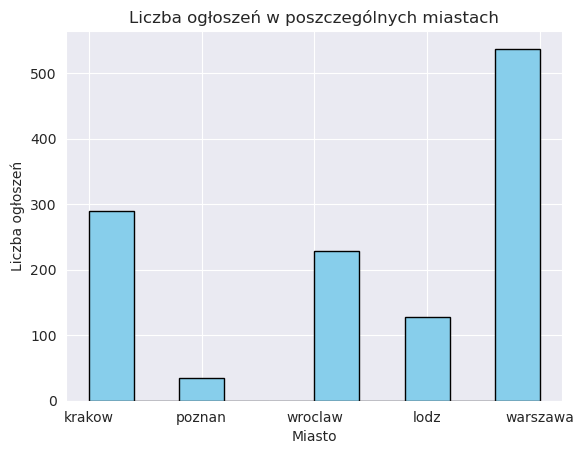

In [49]:
draw_hist(df['city'],'Miasto','Liczba ogłoszeń','Liczba ogłoszeń w poszczególnych miastach')
plt.show()

/home/hubert/miniconda3/envs/stata/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


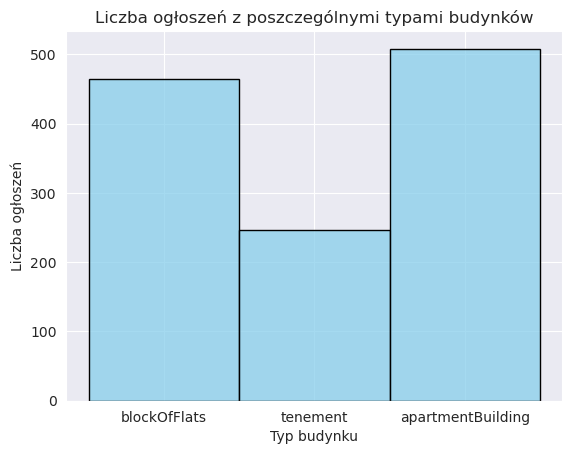

In [35]:
draw_hist(df['type'],'Typ budynku','Liczba ogłoszeń', 'Liczba ogłoszeń z poszczególnymi typami budynków')
plt.show()

In [60]:
cities = {'warszawa': 'Warszawa', 'krakow': 'Kraków', 'wroclaw': 'Wrocław', 'lodz': 'Łódź', 'poznan': 'Poznań'}

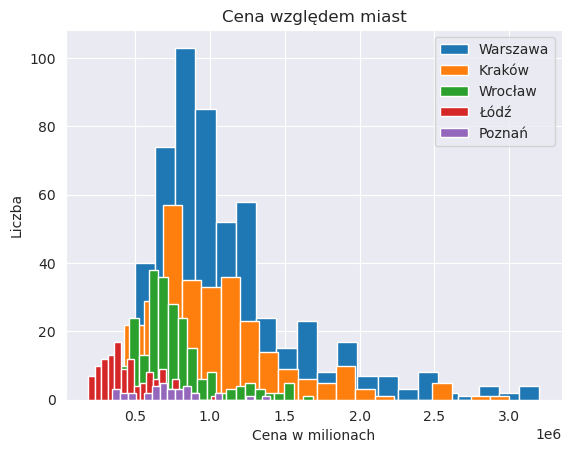

In [61]:
plt.title("Cena względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['price'],bins=20,label=cities.get(city))
plt.xlabel('Cena w milionach')
plt.ylabel('Liczba')
plt.legend()
plt.show()

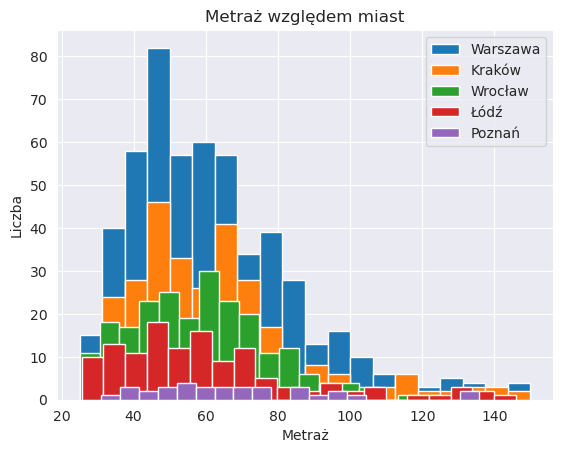

In [62]:
plt.title("Metraż względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['squareMeters'],bins=20,label=cities.get(city))
plt.xlabel('Metraż')
plt.ylabel('Liczba')
plt.legend()
plt.show()

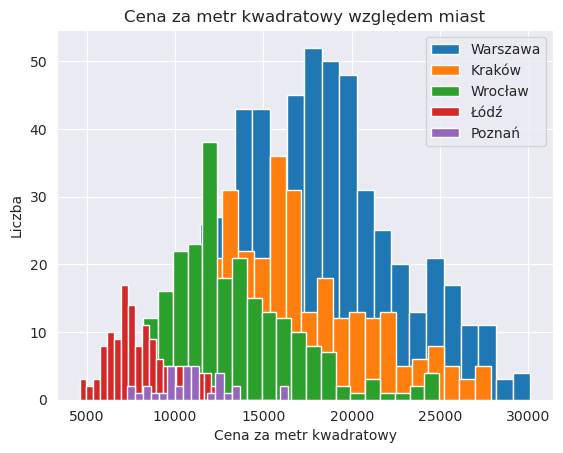

In [63]:
plt.title("Cena za metr kwadratowy względem miast")
for city in cities.keys():
    prices_per_square_meter = df[df['city'] == city]['price'] / df[df['city'] == city]['squareMeters']
    plt.hist(prices_per_square_meter, bins=20, label=cities.get(city))

plt.xlabel('Cena za metr kwadratowy')
plt.ylabel('Liczba')
plt.legend()
plt.show()

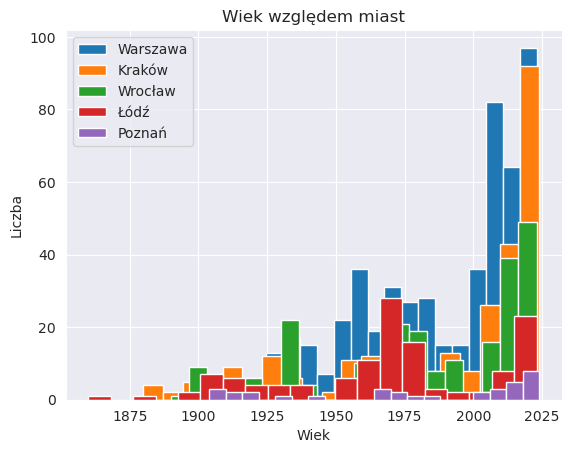

In [78]:
plt.title("Wiek względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['buildYear'],bins=20,label=cities.get(city))
plt.xlabel('Wiek')
plt.ylabel('Liczba')
plt.legend()
plt.show()

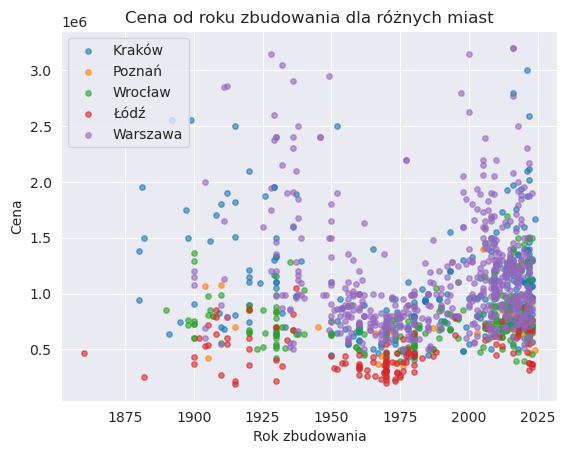

In [85]:
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.scatter(city_data['buildYear'], city_data['price'], label=cities.get(city), alpha=0.6,s=15)

plt.xlabel('Rok zbudowania')
plt.ylabel('Cena w milionach')
plt.title('Cena w zależności od roku zbudowania dla różnych miast')
plt.legend()

plt.show()